# EDA PORTFOLIO

In this Portfolio We will be doing a Uni, Bi, and Tri variate alalysis on the cleaned diabetic dataset. The dataset consists of 49 columns currently and has a size of 101766 values for each column. The dataset has had one column of **'Weight'** removed as it consisted mostly of null values. For the rest of the dataset the null values have been filled with either their mode or is filled as 'unknown'. We will use *Pandas, numpy, and seaborn* for this data analysis. This is done to train a model with the target as ***'readmitted'***. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('cleaned_data/diabetic_data_cleaned.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [3]:
# Dropping unnecessary columns for EDA
# 'encounter_id' and 'patient_nbr' are identifiers and do not contribute to the analysis.

data = data.drop(columns=['encounter_id', 'patient_nbr'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                101766 non-null  object
 8   medical_specialty         101766 non-null  object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [4]:
# Function to calculate the number of bins using Freedman-Diaconis rule
def fd_bins(x):
    n = x.size
    iqr = x.quantile(0.75) - x.quantile(0.25)
    w = 2 * iqr * n ** (-1/3)
    if w > 0:
        return int(np.ceil((x.max() - x.min()) / w))
    else:
        return int(np.ceil(np.log2(n) + 1))

report = []
# Univariate analysis for numerical columns

for col in data.select_dtypes(include='number'):
    s = data[col].dropna()
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_fence, upper_fence = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_count = s[(s < lower_fence) | (s > upper_fence)].count()
    report.append({
        'column': col,
        'count': s.size,
        'mean': s.mean(),
        'std': s.std(),
        'skew': s.skew(),
        'kurtosis': s.kurtosis(),
        'IQR': iqr,
        'outliers': out_count,
        'bins': fd_bins(s)
    })
    
univar_num = pd.DataFrame(report)
print(univar_num)

                      column   count       mean        std       skew  \
0          admission_type_id  101766   2.024006   1.445403   1.591984   
1   discharge_disposition_id  101766   3.715642   5.280166   2.563067   
2        admission_source_id  101766   5.754437   4.064081   1.029935   
3           time_in_hospital  101766   4.395987   2.985108   1.133999   
4         num_lab_procedures  101766  43.095641  19.674362  -0.236544   
5             num_procedures  101766   1.339730   1.705807   1.316415   
6            num_medications  101766  16.021844   8.127566   1.326672   
7          number_outpatient  101766   0.369357   1.267265   8.832959   
8           number_emergency  101766   0.197836   0.930472  22.855582   
9           number_inpatient  101766   0.635566   1.262863   3.614139   
10          number_diagnoses  101766   7.422607   1.933600  -0.876746   

       kurtosis   IQR  outliers  bins  
0      1.942476   2.0       341    82  
1      6.003347   3.0      9818   211  
2  

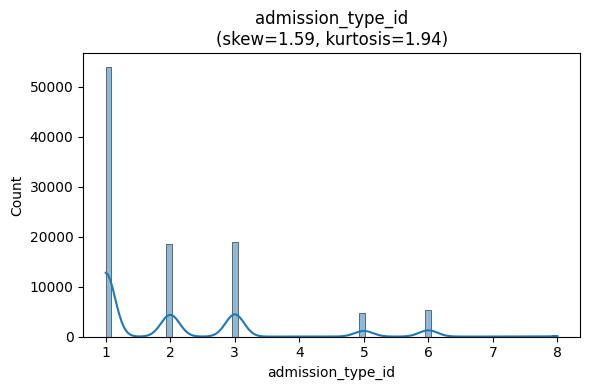

count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64 



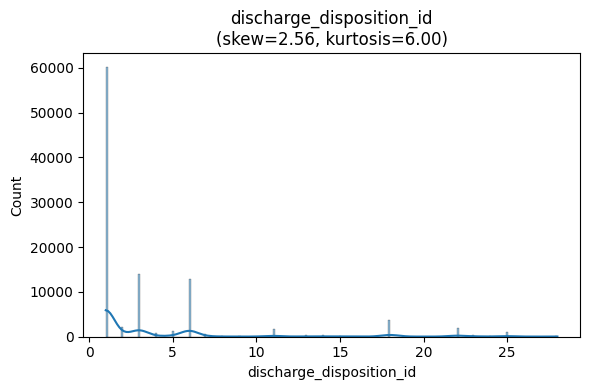

count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64 



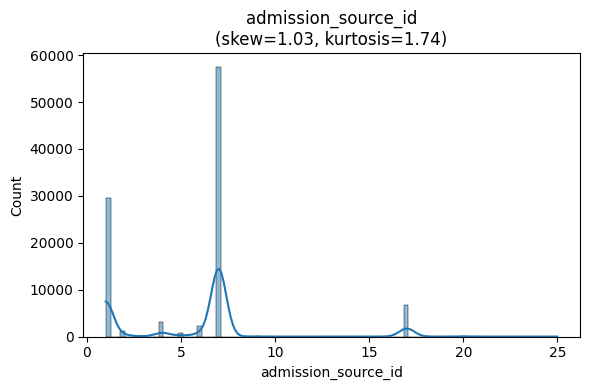

count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64 



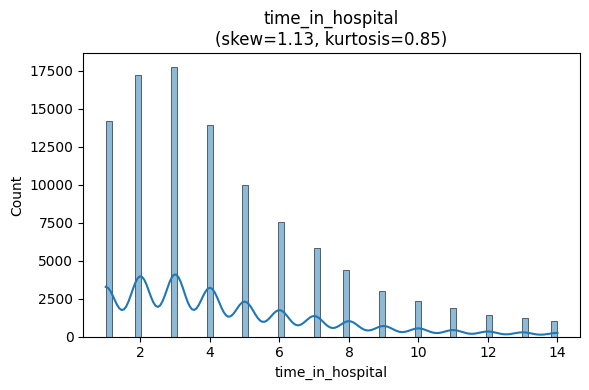

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64 



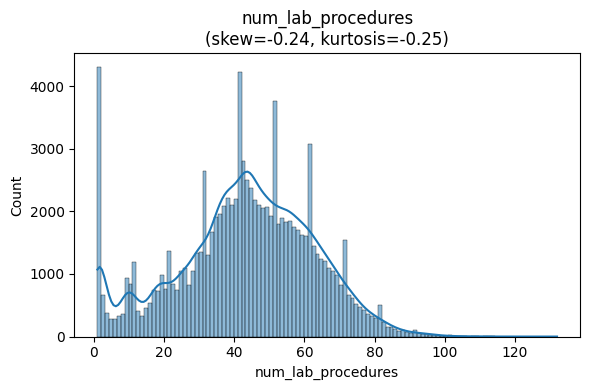

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64 



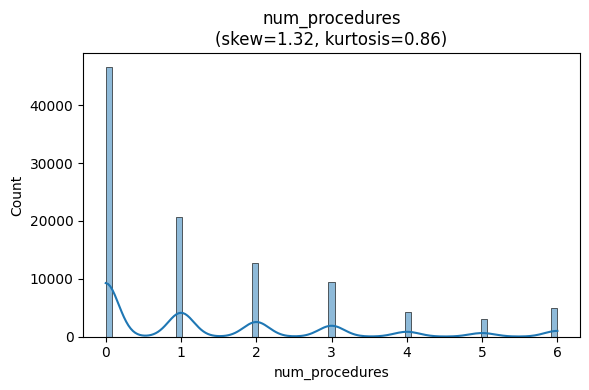

count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64 



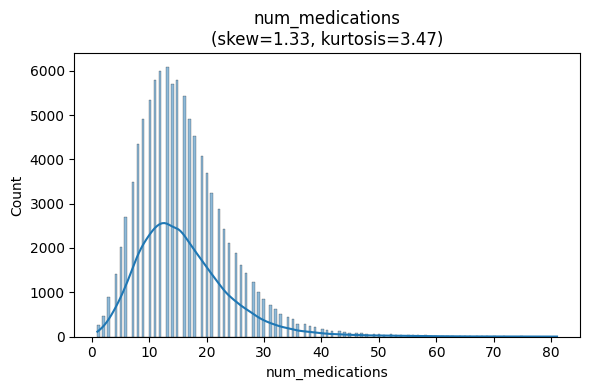

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64 



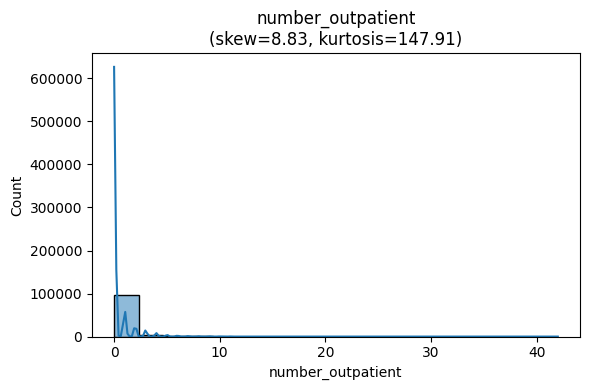

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64 



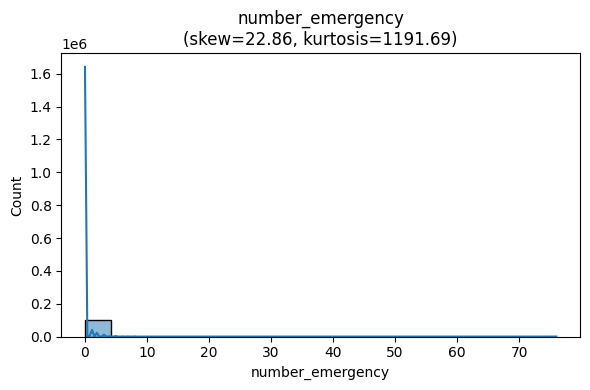

count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64 



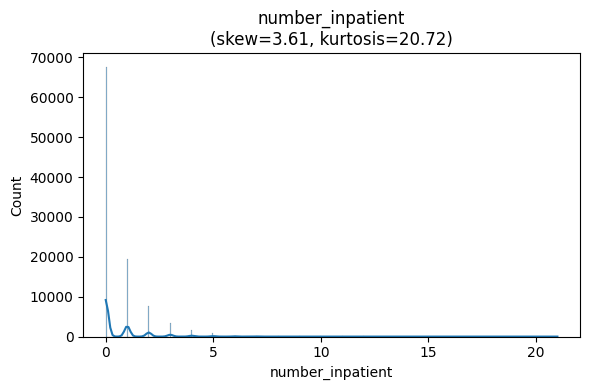

count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64 



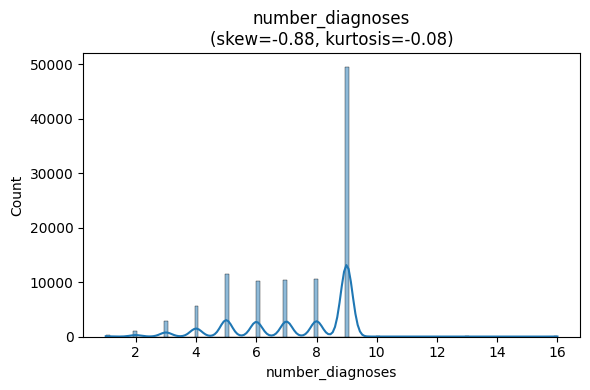

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64 



In [5]:
for _, row in univar_num.iterrows():

    col = row['column']
    bins = int(row['bins'])
    series = data[col].dropna()
    
    plt.figure(figsize=(6, 4))
    sns.histplot(series, bins=bins, kde=True)
    plt.title(f"{col}\n(skew={series.skew():.2f}, kurtosis={series.kurtosis():.2f})")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    print(f'{data[col].describe()} \n')

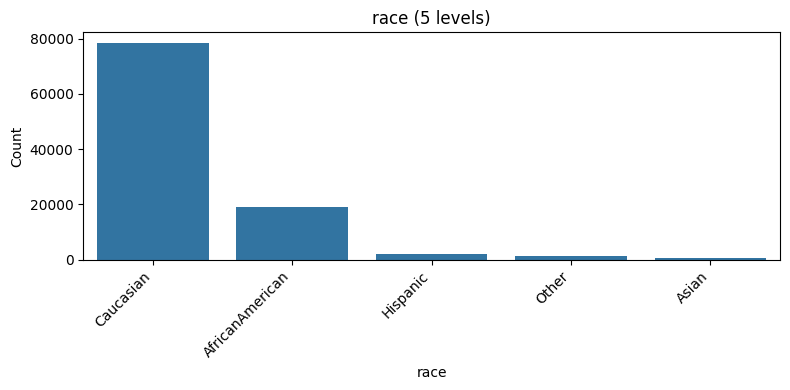

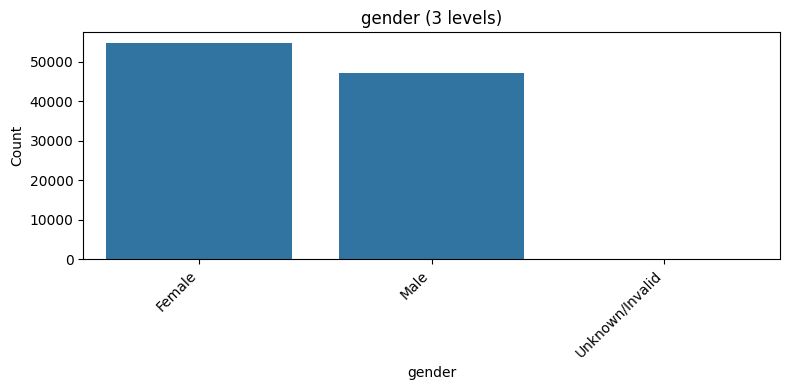

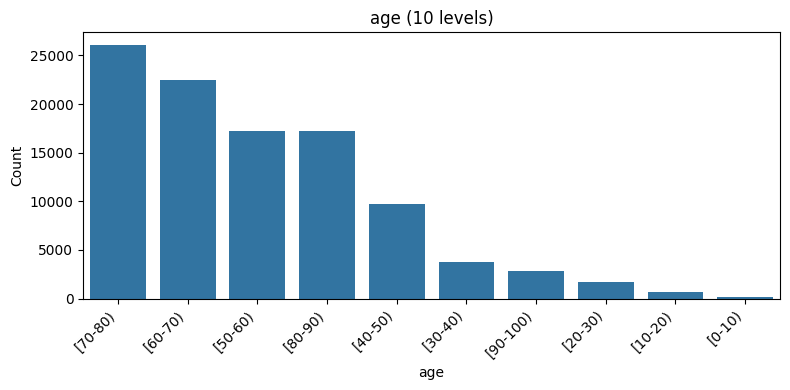

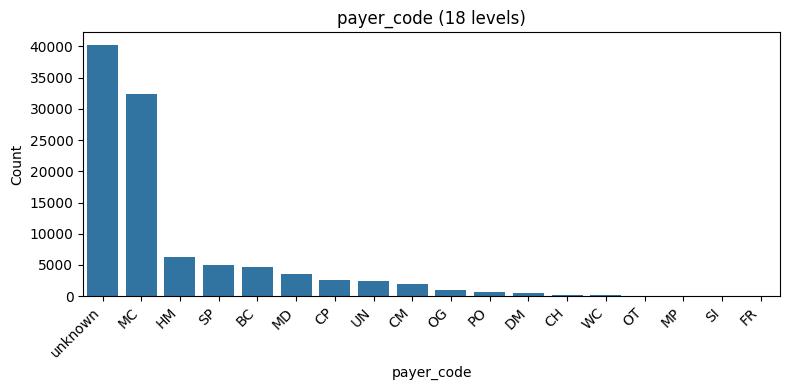

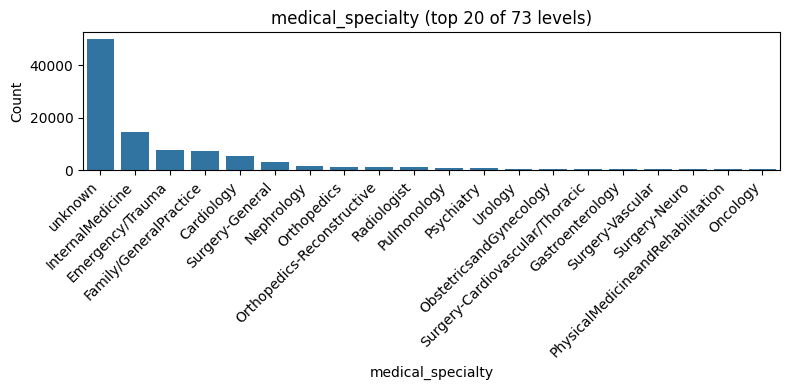

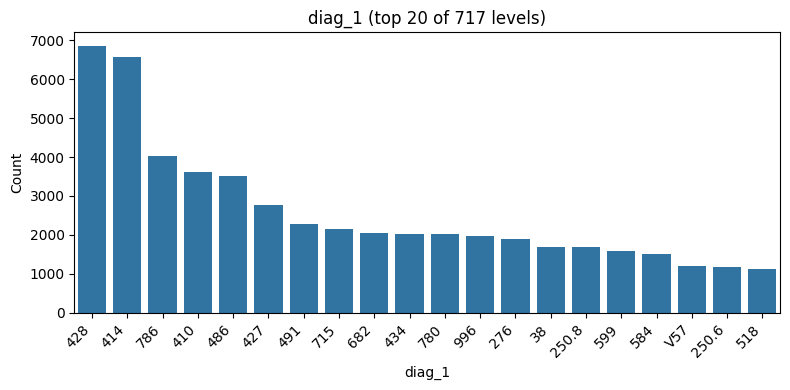

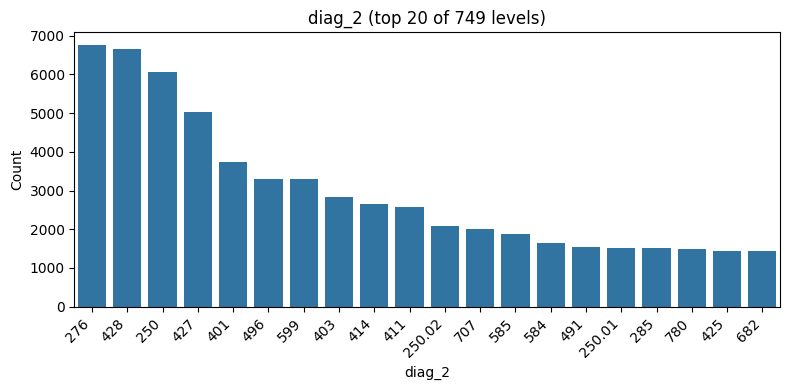

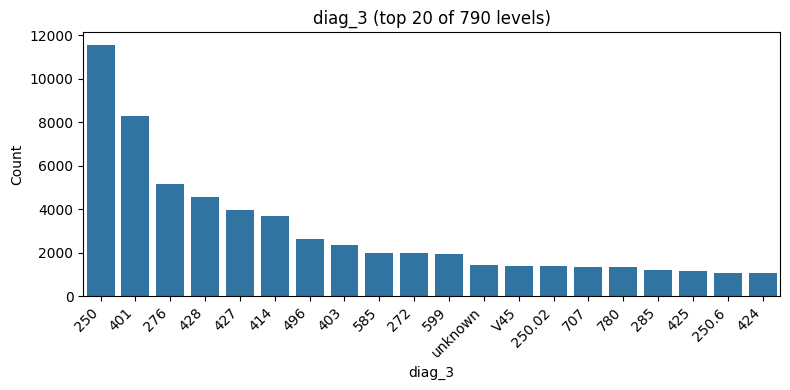

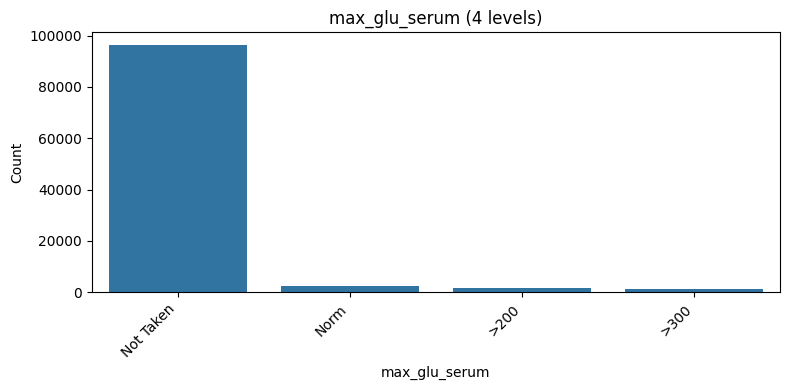

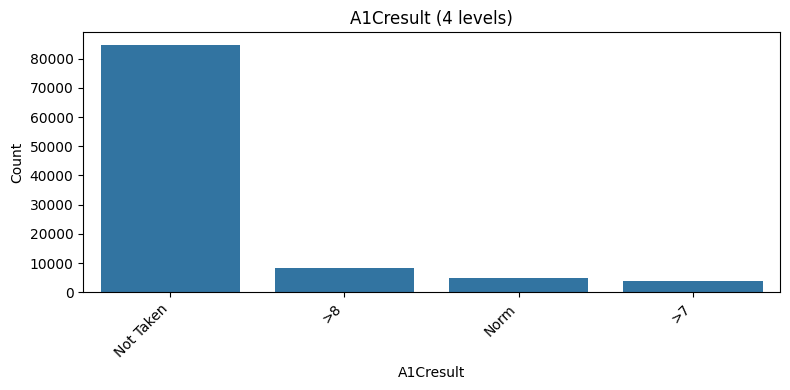

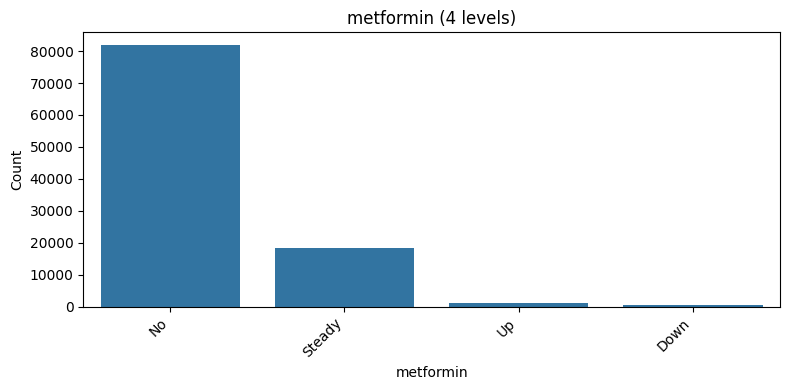

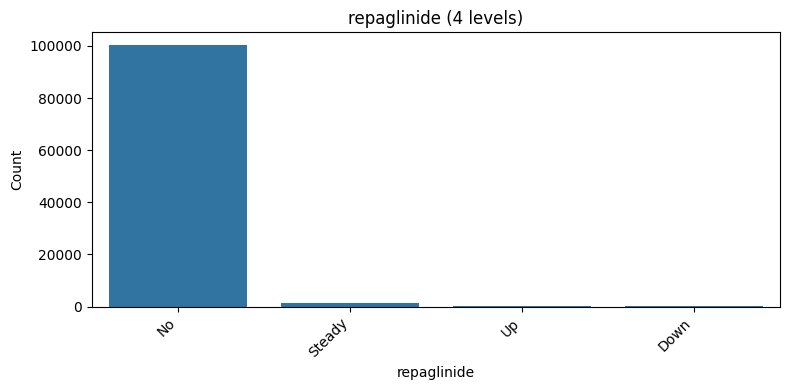

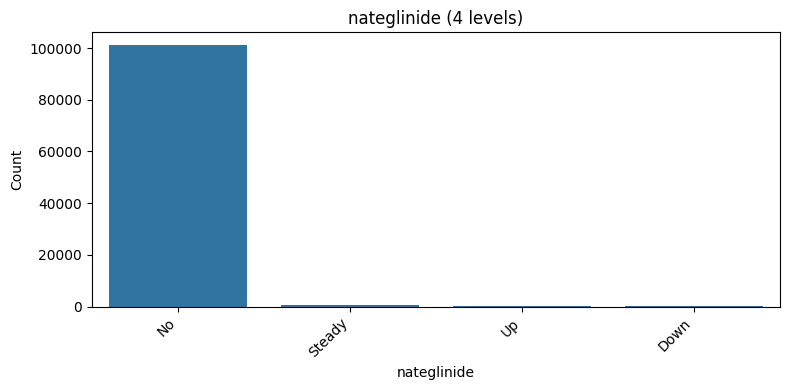

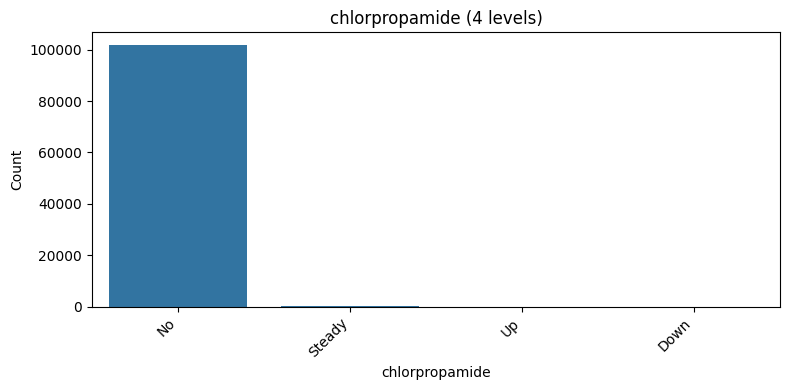

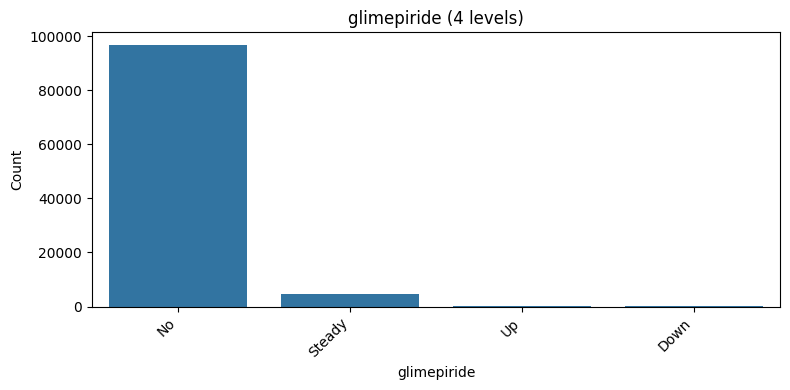

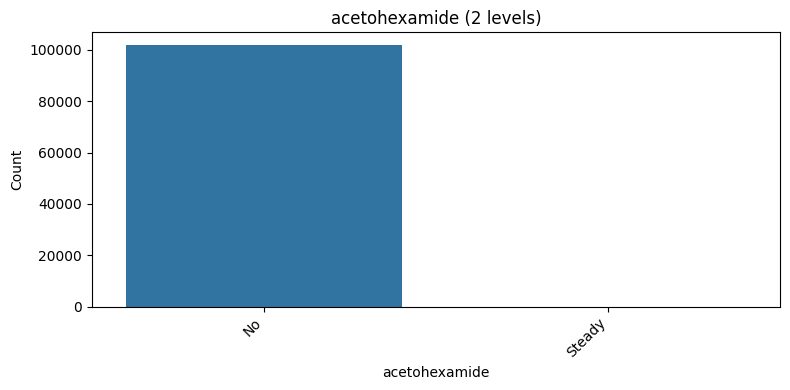

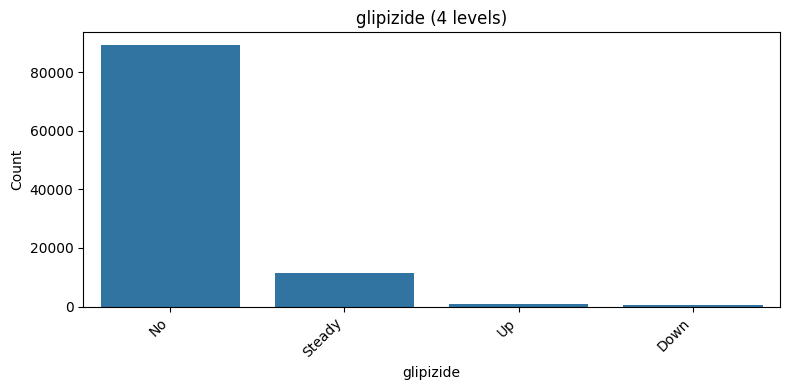

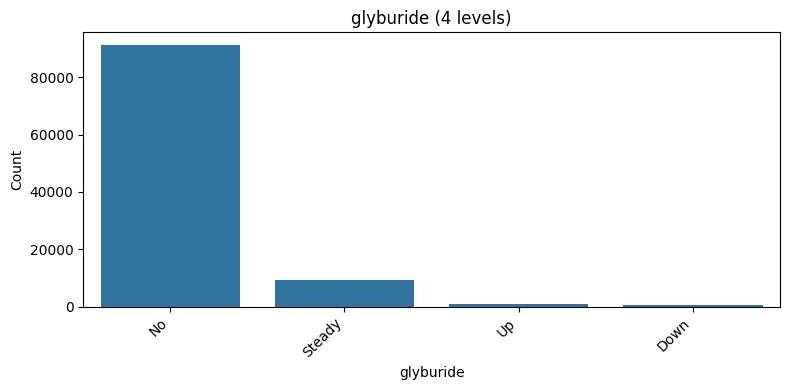

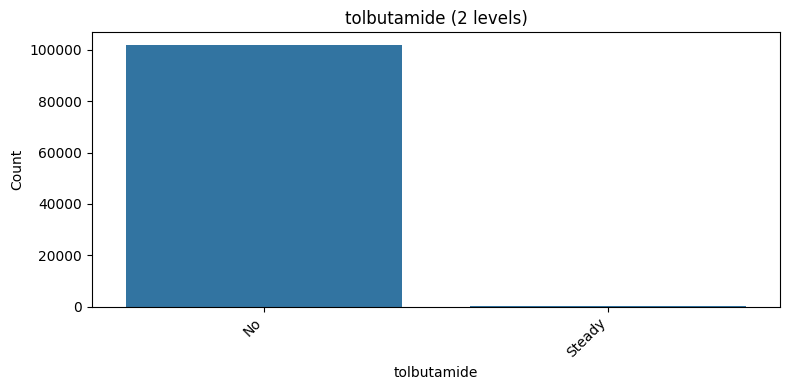

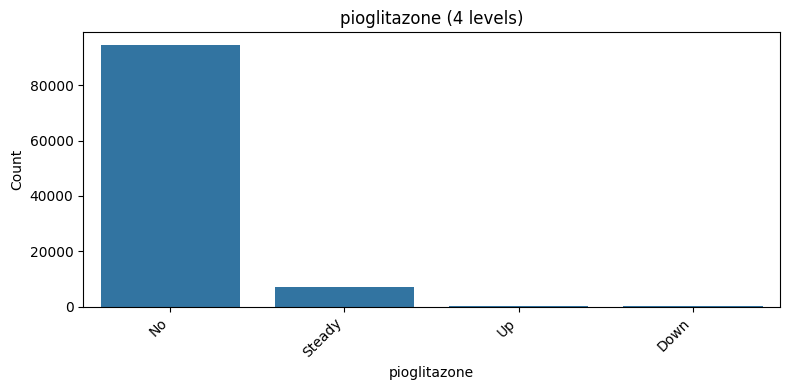

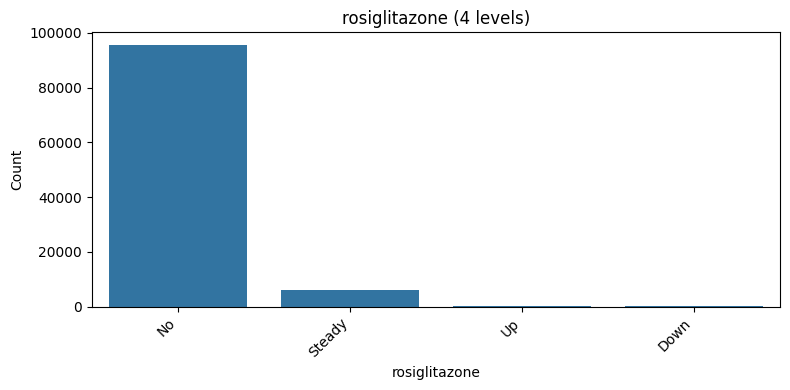

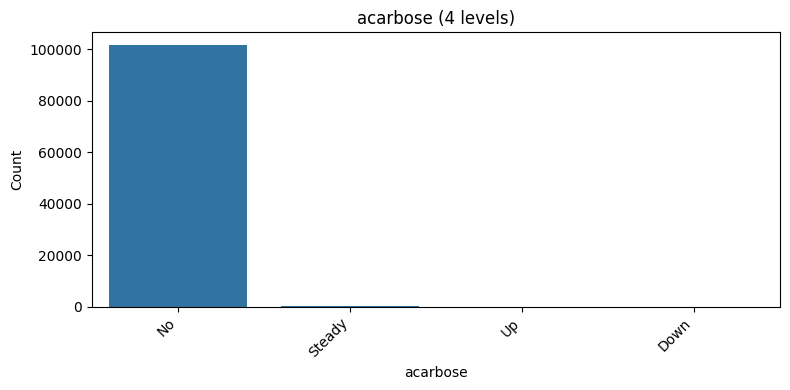

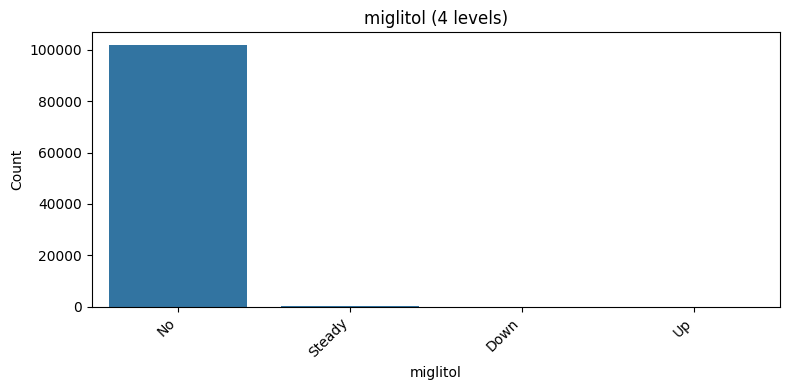

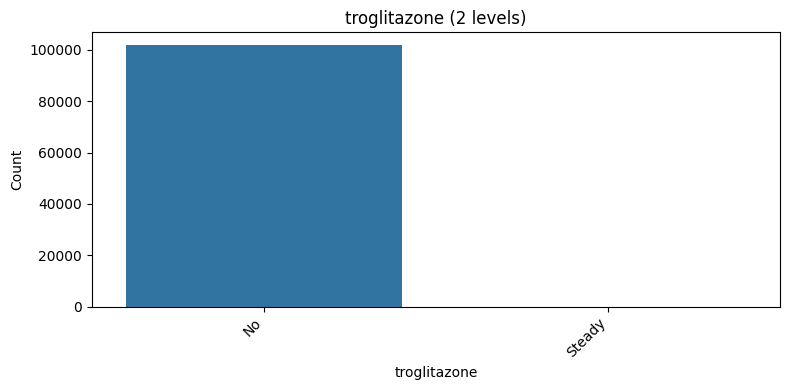

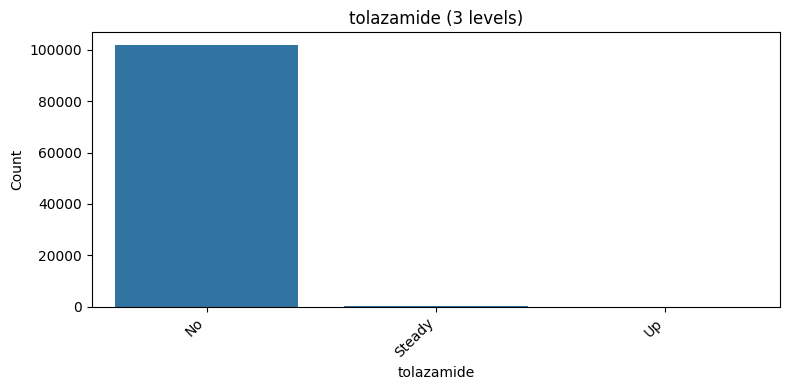

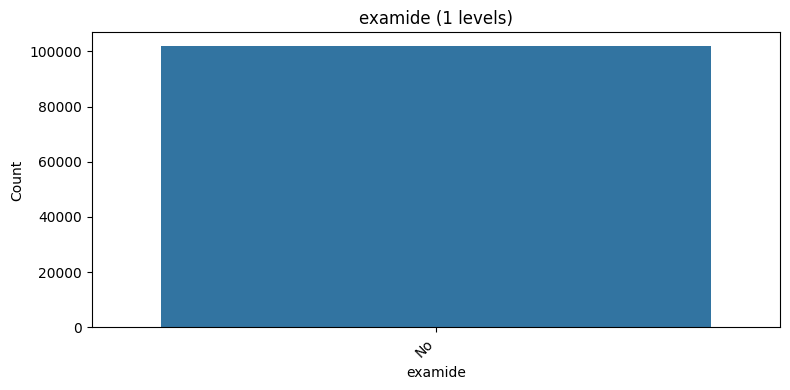

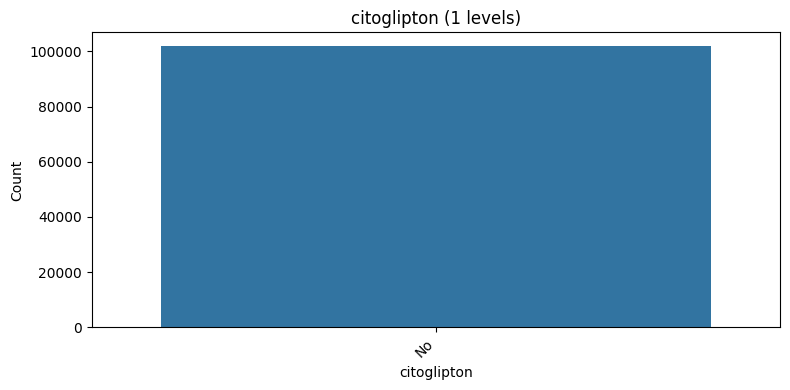

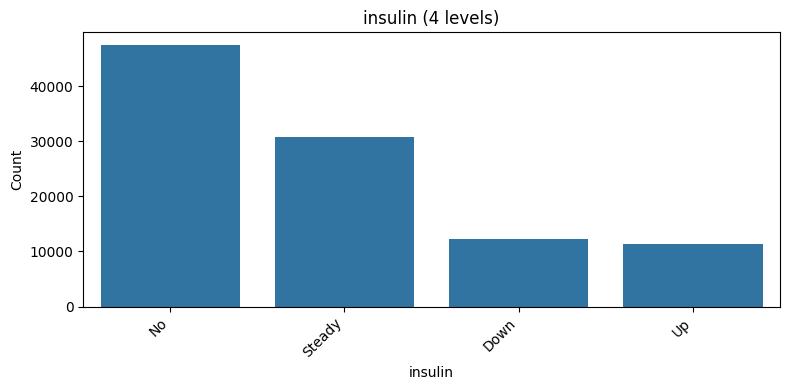

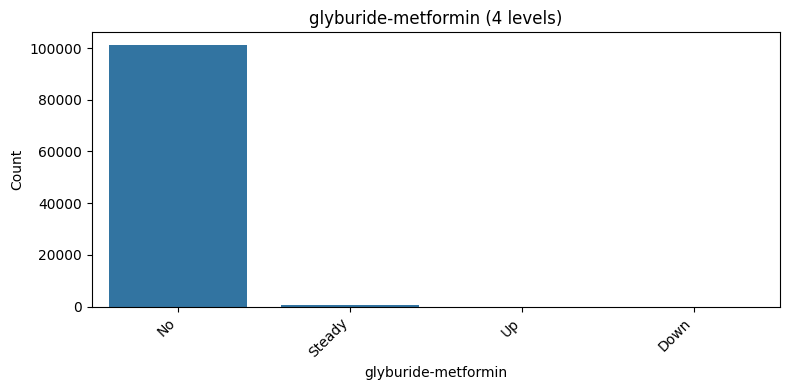

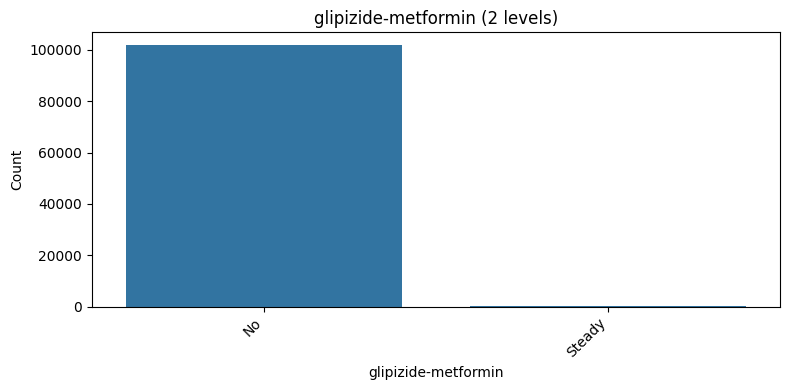

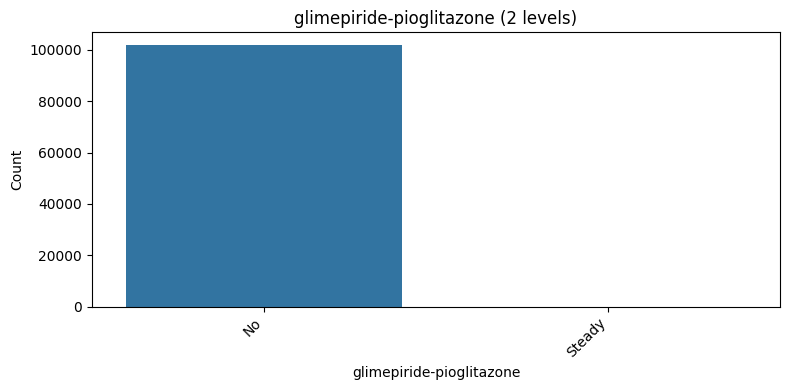

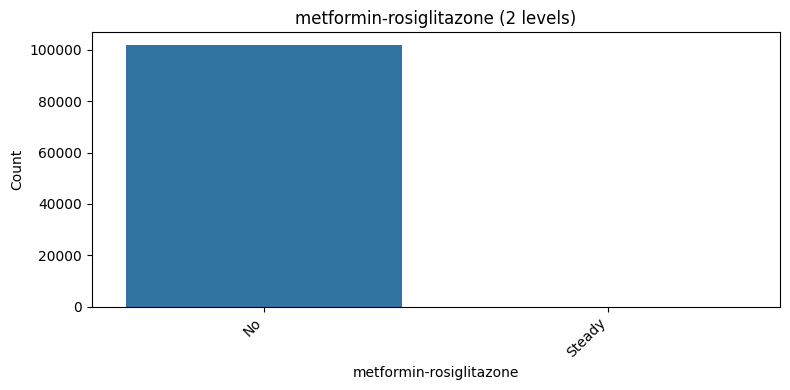

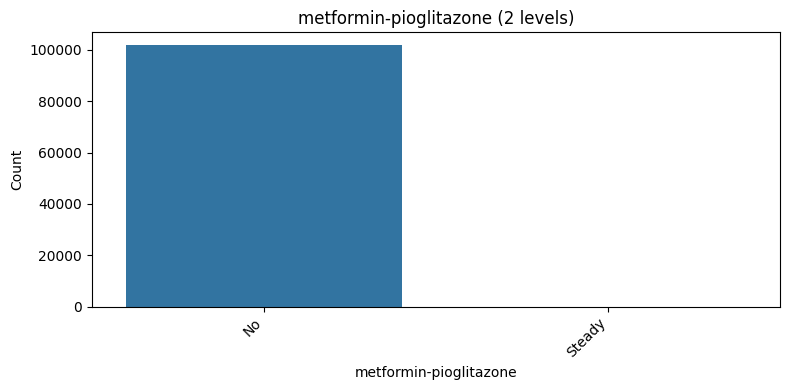

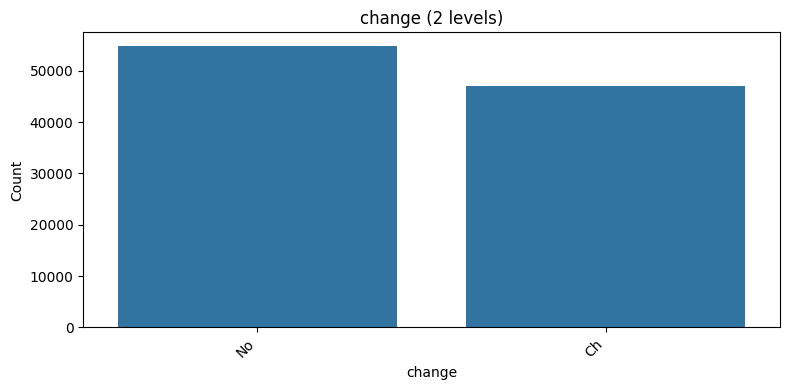

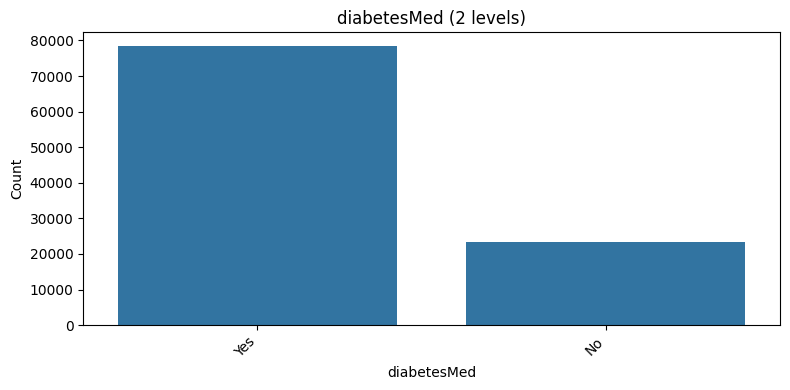

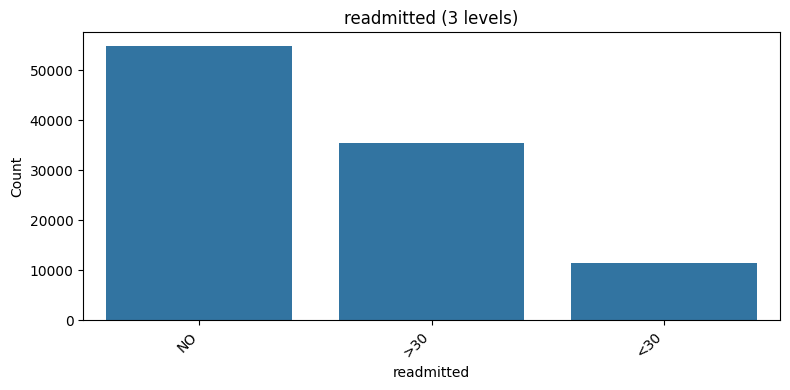

In [6]:
max_categories = 20  # if you have extremely high-cardinality, only plot top-N

for col in data.select_dtypes(include='object').columns:
    vc = data[col].value_counts()
    
    if vc.size > max_categories:
        vc = vc.iloc[:max_categories]
        subtitle = f"(top {max_categories} of {data[col].nunique()} levels)"
    else:
        subtitle = f"({vc.size} levels)"
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"{col} {subtitle}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()